In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df = train_df.drop('baseFare', axis=1)
test_df = test_df.drop('baseFare', axis=1)

In [3]:
y_train = train_df[['totalFare']]
x_train = train_df.drop('totalFare', axis=1)
y_test = test_df[['totalFare']]
x_test = test_df.drop('totalFare', axis=1)

In [4]:
x_train

,days_to_depart,flight_day_of_week,isDeparture_time_6to18,isArriving_time_11to24,stops,travelDuration_h,elapsedDays,isBasicEconomy,isNonStop,seatsRemaining,...,class_first,class_first+coach,class_first+coach+first,class_premium coach,class_premium coach+coach,destinationAirport_ATL,destinationAirport_DFW,destinationAirport_JFK,destinationAirport_LAX,destinationAirport_ORD
0,39.0,5.0,1.0,1.0,1.0,8.233333,0.0,1.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.0,1.0,1.0,0.0,3.100000,0.0,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,14.0,1.0,1.0,0.0,0.0,2.316667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21.0,1.0,1.0,1.0,2.0,10.150000,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,27.0,0.0,1.0,0.0,0.0,5.416667,1.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71026,27.0,0.0,1.0,1.0,0.0,2.566667,0.0,0.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71027,51.0,3.0,1.0,1.0,1.0,8.116667,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71028,23.0,3.0,1.0,1.0,1.0,7.133333,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
71029,23.0,3.0,1.0,1.0,1.0,4.566667,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
from Modeling_reg import Regression_models

Reg_models = Regression_models(x_train, y_train, x_test, y_test, standardlise=True)

Best parameters:  {'n_estimators': 150, 'max_depth': 10}
XGBR train 0.9700092250701566
XGBR test 0.8702182347173175 



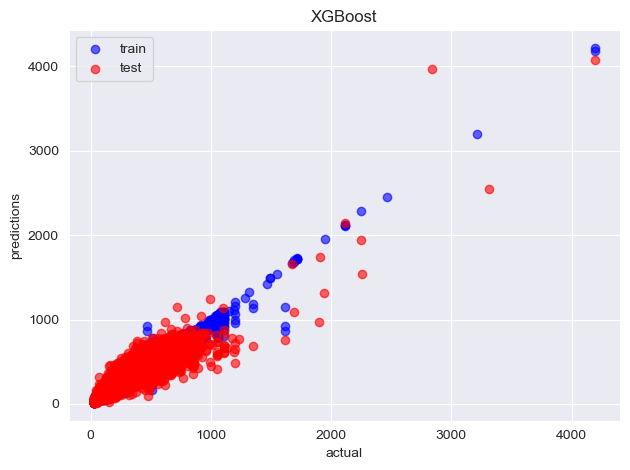

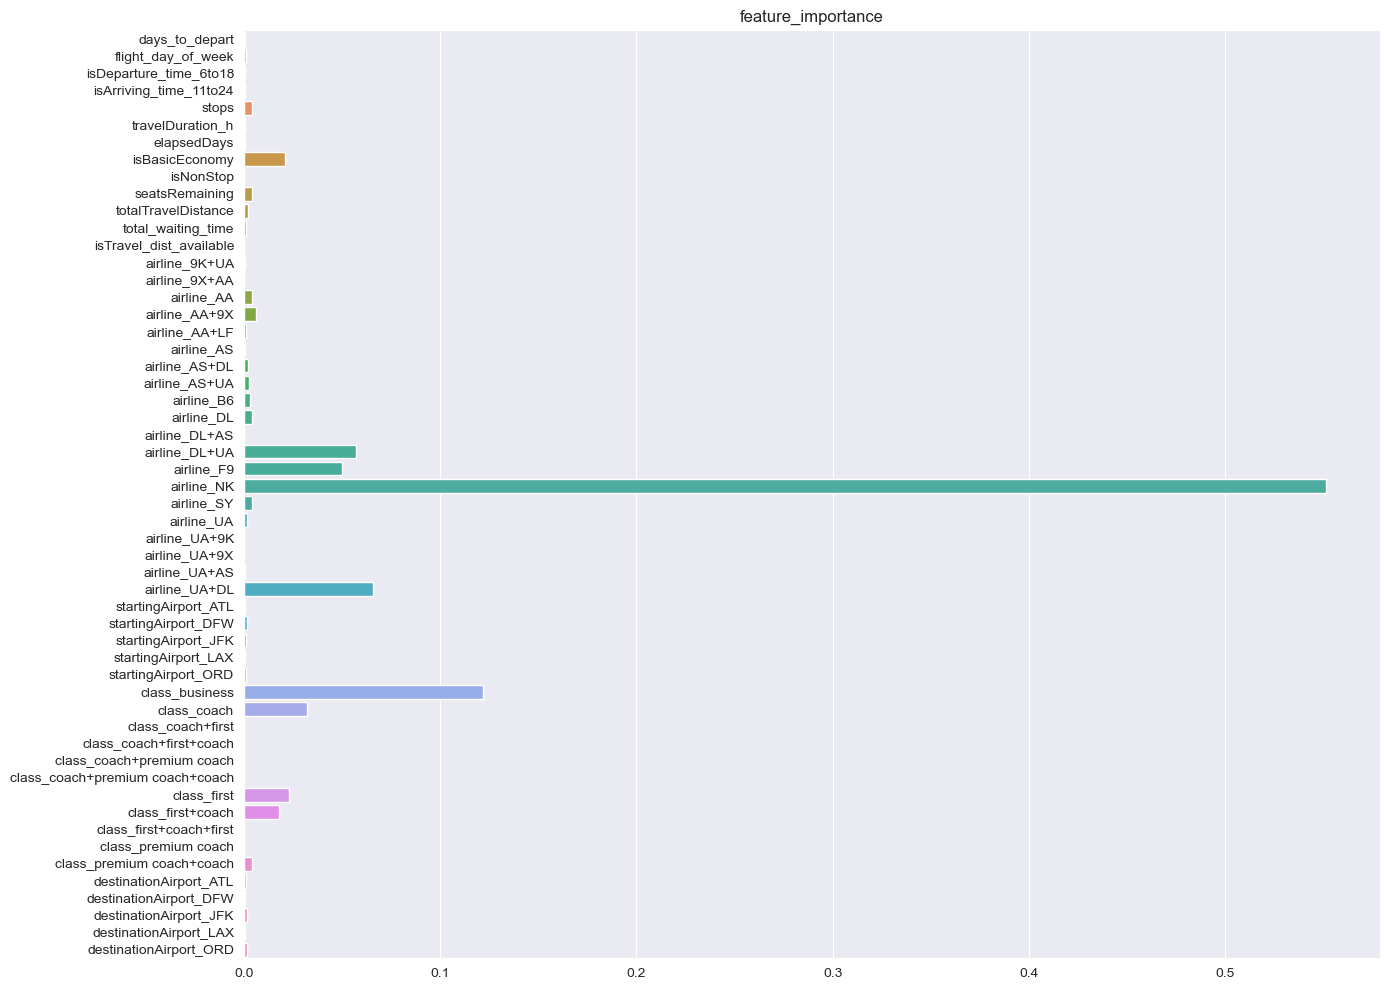

In [7]:
# best para: 150, 10
xgb_model = Reg_models.XGBR(search=False, best_depth_input=10, best_Nestimators=150, show_avsp=True,
                            show_features_imp=True)


In [22]:
pd.DataFrame(data={'features': np.array(Reg_models.features_names_list), 'importance': xgb_model.feature_importances_})

,features,importance
0,days_to_depart,0.000587
1,flight_day_of_week,0.000942
2,isDeparture_time_6to18,0.000302
3,isArriving_time_11to24,0.000395
4,stops,0.003867
5,travelDuration_h,0.000366
6,elapsedDays,0.000773
7,isBasicEconomy,0.021030
8,isNonStop,0.000000
9,seatsRemaining,0.004192


In [23]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Parameters need to be modified based on data.

L1 regularization, also known as Lasso regularization, adds a penalty term to the objective function that is proportional to the sum of the absolute values of the model coefficients. This penalty encourages the model to use fewer features by setting the coefficients of irrelevant or redundant features to zero, effectively performing feature selection. L1 regularization can also help to make the model more robust to outliers.

L2 regularization, also known as Ridge regularization, adds a penalty term to the objective function that is proportional to the sum of the squares of the model coefficients. This penalty encourages the model to use smaller values for the coefficients, effectively shrinking them towards zero. This can help to reduce the variance of the model, making it less sensitive to small changes in the input data.

L1 regularization tends to work well when the dataset contains many irrelevant or redundant features, as it helps to perform feature selection by setting the coefficients of these features to zero. L1 regularization can also help when you have limited data and want to reduce the model complexity to avoid overfitting.

On the other hand, L2 regularization tends to work well when the dataset contains a large number of features, and you want to prevent the model from overfitting by reducing the variance. L2 regularization can also be helpful when there is collinearity among the features, as it tends to distribute the weight among all the correlated features rather than assigning a large weight to a single feature.

In [24]:
seq_NN = Reg_models.NN_sequential(epoch_num=100,loss_func='rmse')

Epoch 1/100
237/237 [==============================] - 2s 6ms/step - loss: 183.4139 - r_squared: -0.5177
Epoch 2/100
237/237 [==============================] - 1s 5ms/step - loss: 84.5205 - r_squared: 0.7478
Epoch 3/100
237/237 [==============================] - 1s 5ms/step - loss: 82.4909 - r_squared: 0.7648
Epoch 4/100
237/237 [==============================] - 1s 5ms/step - loss: 82.4605 - r_squared: 0.7635
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 80.1595 - r_squared: 0.7734
Epoch 6/100
237/237 [==============================] - 1s 5ms/step - loss: 80.1731 - r_squared: 0.7741
Epoch 7/100
237/237 [==============================] - 2s 7ms/step - loss: 79.5505 - r_squared: 0.7820
Epoch 8/100
237/237 [==============================] - 1s 5ms/step - loss: 79.4034 - r_squared: 0.7835
Epoch 9/100
237/237 [==============================] - 1s 5ms/step - loss: 78.3631 - r_squared: 0.7866
Epoch 10/100
237/237 [==============================] - 1s 5ms/step - l

## We shall consider the model with regulization term and different loss function.

## We shall also reconsider the features engineering

## We test the model performance
### Now, say we have two models, say a linear regression model and a neural network. How can we say which model is better? We can do K-fold cross-validation and see which one proves better at predicting the test set points. But once we have used cross-validation to select the better performing model, we train that model (whether it be the linear regression or the neural network) on all the data. We don't use the actual model instances we trained during cross-validation for our final predictive model.